In [138]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold, GridSearchCV,RandomizedSearchCV 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression, Lasso
import seaborn as sns

## How good is the model

### Assessing a diabetes prediction classifier

In [12]:
# Import the data
diabetes_df = pd.read_csv('../data/diabetes_clean.csv')
#diabetes_df.head()

# Create X, an array of the values from the sales_df DataFrame's "radio" column.
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

# Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data.
knn.fit(X_train, y_train)

# Predict the labels of the test set, storing the results as y_pred.
y_pred = knn.predict(X_test)

# Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[132  18]
 [ 49  32]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       150
           1       0.64      0.40      0.49        81

    accuracy                           0.71       231
   macro avg       0.68      0.64      0.64       231
weighted avg       0.70      0.71      0.69       231


### Plot basic Confusion matrix

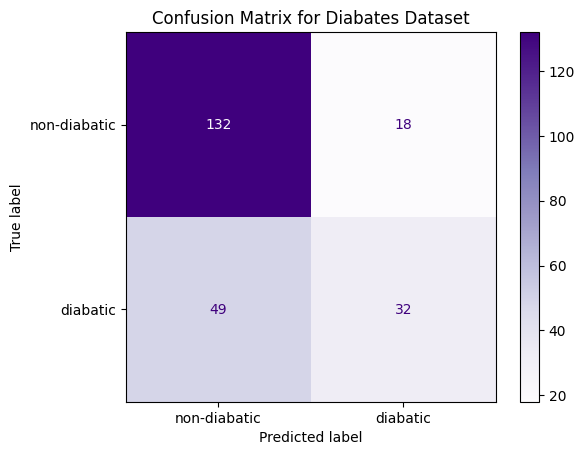

In [21]:
# Plotting the Confusion Matrix with Labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

target_levels = ['non-diabatic','diabatic']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_levels)
disp.plot(cmap=plt.get_cmap('Purples'))
plt.title('Confusion Matrix for Diabates Dataset')
plt.show()

### Plot Confusion Matrix Plot with percentages & total numbers

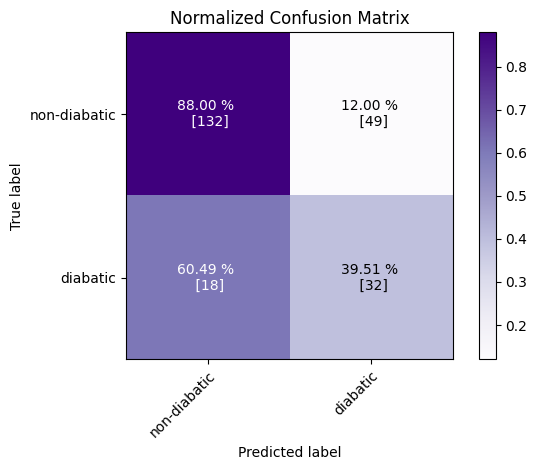

In [35]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


target_levels = ['non-diabatic','diabatic']

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix with percentages
fig, ax = plt.subplots()
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.get_cmap('Purples'))
ax.figure.colorbar(im, ax=ax)

# We want to show all ticks and label them with the respective list entries
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=target_levels, yticklabels=target_levels,
       title='Normalized Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f'
thresh = cm_normalized.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cmn = format(cm_normalized[i, j]*100 ,fmt)
        cmo = cm[j,i]
        ax.text(j, i,  str(cmn) + ' % \n [' + str(cmo) + ']' ,
                ha="center", va="center",
                color="white" if cm_normalized[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### Plot Classification Report - I

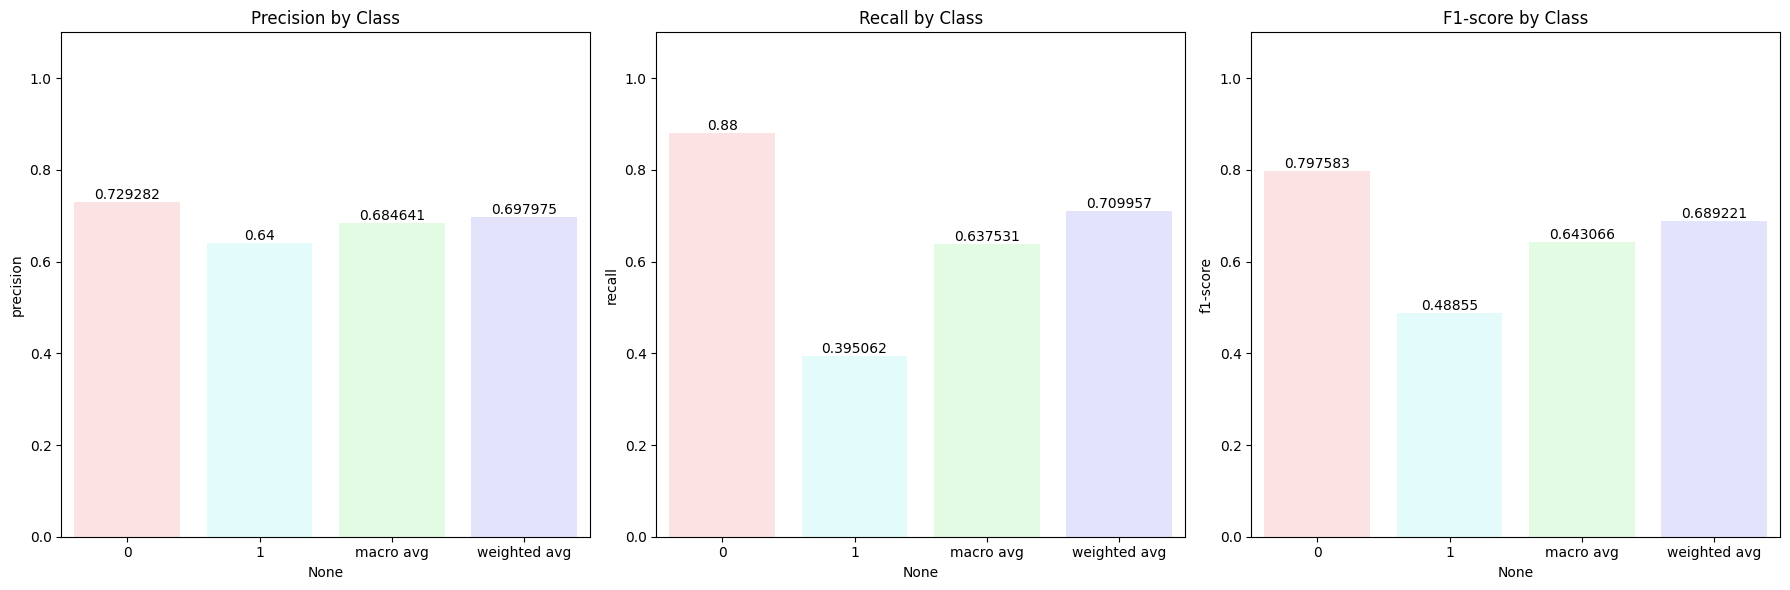

In [101]:
# Generate classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

def visualize_report(report):
    # Define custom colors
    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff']

    # Extracting metrics for each class
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Include class-specific metrics
    for cls, metrics_values in report.items():
        if cls.isdigit() or cls in ['macro avg', 'weighted avg']:
            labels.append(cls)
            for metric in metrics:
                data[metric].append(metrics_values.get(metric, None))

    # Convert data to DataFrame for easy plotting
    df = pd.DataFrame(data, index=labels)
    
    # Creating subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, metric in zip(axes, metrics[:-1]):  # Exclude 'support' for plotting
        sns.barplot(ax=ax, x=df.index, y=metric, data=df ,palette=colors, hue=df.index, legend=False)
        for i in range(len(df.index)):
            #print(ax.containers[i][0])
            ax.bar_label(ax.containers[i])
            #ax.text(i,0.4, 'xx', ha='center', va='center')
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)

    
        
    plt.tight_layout()
    plt.show()

visualize_report(class_report)

### Simple visualization of a classification report using matplotlib

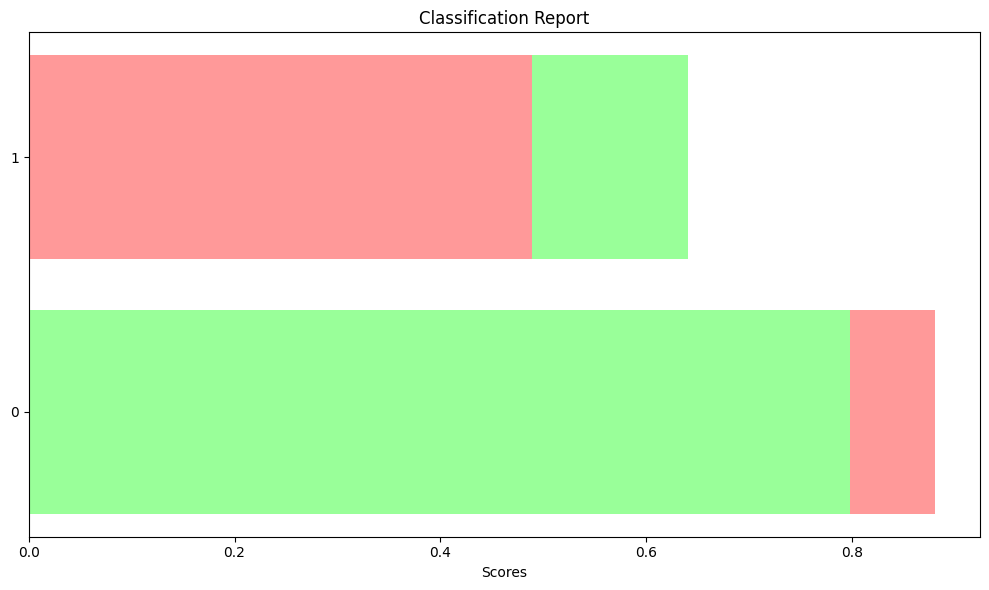

In [110]:
# # Generating classification report
class_report = classification_report(y_test, y_pred, output_dict=True)

# Function to plot classification report
def plot_classification_report(report):
    
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    values = [report[label]['precision'] for label in labels] + [report[label]['recall'] for label in labels] + [report[label]['f1-score'] for label in labels]
    labels = ['Precision']*len(labels) + ['Recall']*len(labels) + ['F1-Score']*len(labels)
    metrics = list(report.keys())[:-3] * 3
    #print(metrics)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(metrics, values, color=['#9999ff', '#99ff99', '#ff9999']*len(report.keys()))
    ax.set_xlabel('Scores')
    ax.set_title('Classification Report')
    plt.tight_layout()
    plt.show()

# Plotting the classification report
plot_classification_report(class_report)

### Comprehensive visualization of classification report with precision, recall, f1-score, and support using matplotlib

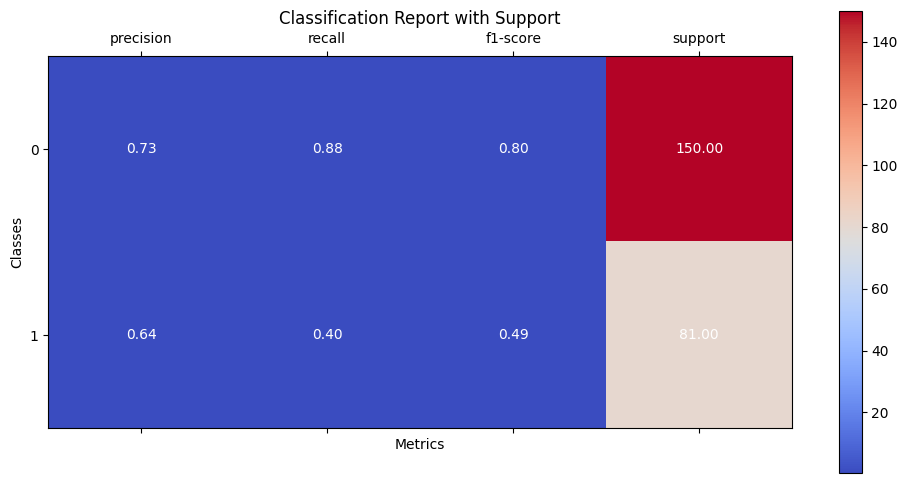

In [111]:
# Generating classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Function to plot classification report with support
def plot_classification_report_with_support(report):
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = np.array([[report[label][metric] for metric in metrics] for label in labels])
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(data, cmap='coolwarm')
    plt.xticks(range(len(metrics)), metrics)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar(cax)
    # Adding the text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report with Support')
    plt.show()

# Plotting the classification report with support
plot_classification_report_with_support(report)

## Logistic Regression and the ROC curve

### Building a logistic regression model

In [124]:
# Import the data
diabetes_df = pd.read_csv('../data/diabetes_clean.csv')
#diabetes_df.head()

# Create X, an array of the values from the sales_df DataFrame's "radio" column.
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

# Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

# Instantiate a logistic regression model, logreg
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data.
logreg.fit(X_train, y_train)

# Predict the labels of the test set, storing the results as y_pred.
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.
roc_auc_score_logreg = logreg.score(X_test, y_test)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
classification_report_logreg = classification_report(y_test, y_pred)
print(roc_auc_score_logreg,confusion_matrix_logreg,classification_report_logreg)

# Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])

0.7402597402597403 [[129  21]
 [ 39  42]]               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

[0.22827894 0.29826638 0.72565143 0.63181503 0.44267488 0.07904877
 0.72624079 0.12511699 0.04289741 0.35171416]


### ROC curve

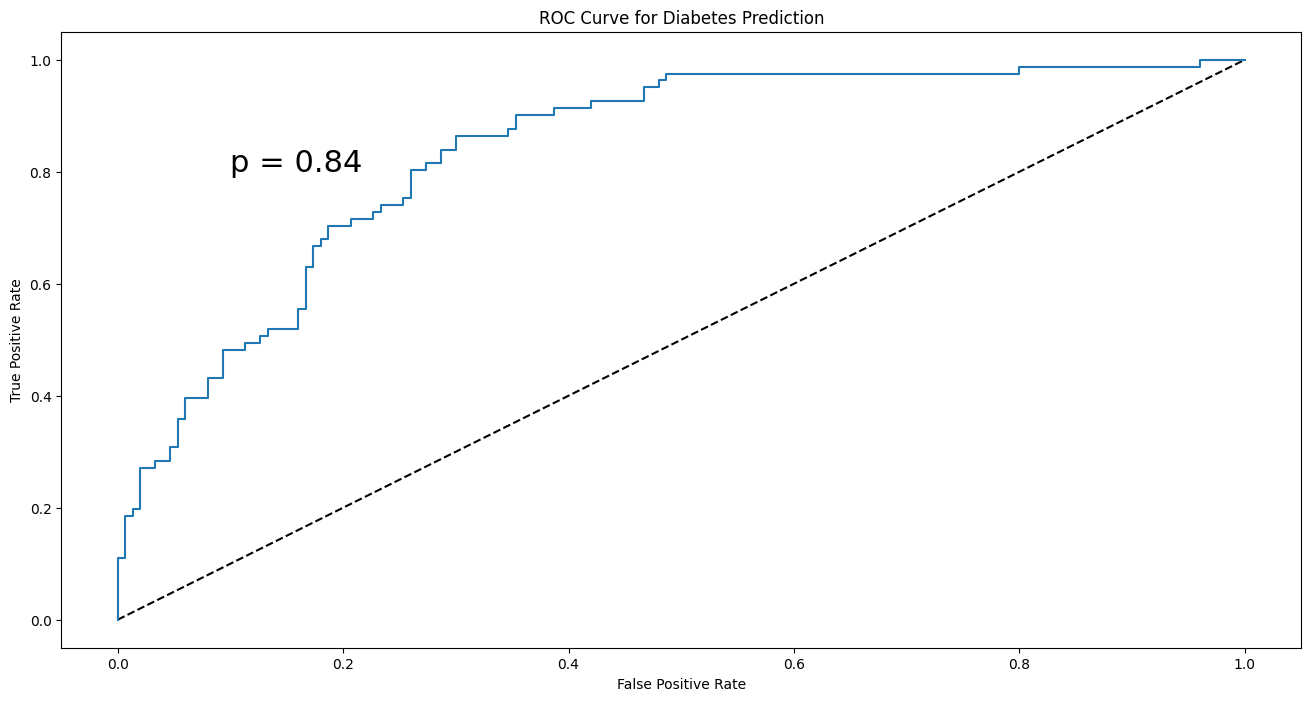

In [129]:
# Calculate roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs)

plt_text = 'p = ' + str(round(auc,2))

# Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

fig, ax = plt.subplots(figsize=(16,8))

# Plot true positive rate against false positive rate
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.text(0.1,0.8,plt_text, fontsize = 22)
plt.show()


### ROC AUC

In [125]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8375308641975308


## Hyperparameter Tuning

### Hyperparameter tuning with GridSearchCV

In [136]:
# Import the data
diabetes_df = pd.read_csv('../data/diabetes_clean.csv')
#diabetes_df.head()

# Create X, an array of the values from the sales_df DataFrame's "radio" column.
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

# Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

# Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5
kf =KFold(n_splits=6, shuffle=True, random_state=5)

# Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1
param_grid = {'alpha': np.linspace(0.00001,1,20)}

# Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
lasso = Lasso(alpha=0)
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit the grid search object to the training data to perform a cross-validated grid search.
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))


Tuned lasso paramaters: {'alpha': np.float64(1e-05)}
Tuned lasso score: 0.25973765286391487


### Hyperparameter tuning with RandomizedSearchCV

In [140]:
logreg = LogisticRegression()

# Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, 
# and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.

params = {'penalty': [ 'l2'], 
          "tol": np.linspace(0.0001, 1.0, 50),
          'C': np.linspace(0.1,1.0,50),
          'class_weight': ['balanced',{0:0.8, 1:0.2}]}

# Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit logreg_cv to the training data.
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': np.float64(0.7755326530612244), 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': np.float64(0.6142857142857143)}
Tuned Logistic Regression Best Accuracy Score: 0.6516645859342488
